<a href="https://colab.research.google.com/github/Nasita25/data_analytics/blob/main/TrackA/PYTHON/COVID19_DATA_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID 19 Data Analysis

*Task 1: Tony

*Task 2: Amy


*Task 3: Amy


*Task 4: Tony


*Task 5: Nasita


*Task 6: Tony/Nasita

**Description:** This script will read the latest data from the New York Times' county-level COVID-19 database at https://github.com/nytimes/covid-19-data/blob/master/us-counties.csv, filter the data for a chosen county in a chosen state, calculate the daily count of new cases and new deaths, print the most recent 28 days' worth of data for the selected county, and save the county's data for all dates to a comma-separated value (.csv) file on your computer. The printed data can be copied and pasted directly into a spreadsheet for further analysis and visualization.

**Note:** For information about the data, see https://github.com/nytimes/covid-19-data.

**Note:** After you have run the script one time in a given Anaconda environment, you may reduce the script's execution time by adding a `#` in front of `pip install pandas`. For example, `#pip install pandas` instead of `pip install pandas`. The `#` will tell Python to skip the code without running it.

# Task 1 : Environment Set up

Import all required libraries that are needed for data analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline

# Task 2 :  Data Collection

Use nytimes github repository as a data source to collect the covid 19 data in real time and ingest it into colab notebook for data analysis purpose

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')

In [ ]:
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [ ]:
df.tail()

,date,state,fips,cases,deaths
17609,2021-01-16,Virginia,51,429391,5706
17610,2021-01-16,Washington,53,290896,3971
17611,2021-01-16,West Virginia,54,108124,1761
17612,2021-01-16,Wisconsin,55,566275,5906
17613,2021-01-16,Wyoming,56,49068,522


In [ ]:
df.describe()

,fips,cases,deaths
count,17614.000000,1.761400e+04,17614.000000
mean,31.910469,1.180861e+05,2971.343874
std,18.639954,2.251762e+05,5536.457301
min,1.000000,1.000000e+00,0.000000
25%,17.000000,4.558500e+03,98.000000
50%,31.000000,3.388450e+04,770.000000
75%,46.000000,1.325918e+05,3303.000000
max,78.000000,2.974966e+06,40376.000000


# Task 3 : Data Wrangling and EDA (Exploratory Data Analysis)

**1. Analyzing New York state data for Covid 19**

In [ ]:
df_ny = df[ df['state'] == 'New York']
df_ny.head()


,date,state,fips,cases,deaths
246,2020-03-01,New York,36,1,0
261,2020-03-02,New York,36,1,0
276,2020-03-03,New York,36,2,0
293,2020-03-04,New York,36,11,0
313,2020-03-05,New York,36,22,0


In [ ]:
df_ny.tail()

,date,state,fips,cases,deaths
17372,2021-01-12,New York,36,1164819,39588
17427,2021-01-13,New York,36,1179523,39760
17482,2021-01-14,New York,36,1193710,39997
17537,2021-01-15,New York,36,1213179,40203
17592,2021-01-16,New York,36,1229124,40376


In [ ]:
df_ny.shape

(322, 5)

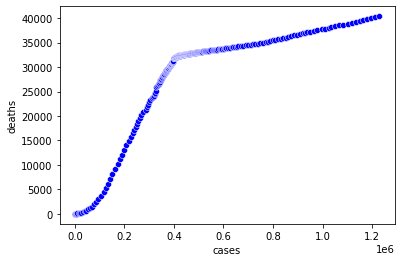

In [ ]:
sns.scatterplot(data=df_ny , x = "cases", y = 'deaths' , color = "blue")

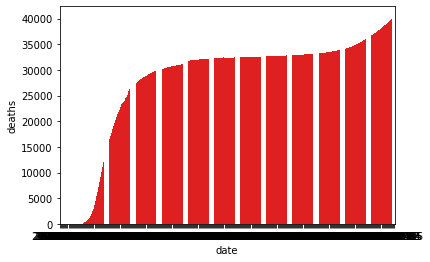

In [ ]:
sns.barplot(data = df_ny , x= "date", y = "deaths" , color="red")

In [ ]:
df_ny['cases'].mean()

447385.50310559006

In [ ]:
df_ny['cases'].median()

425311.5

**2. Find new covid 19 cases daily basis (new cases added everyday)**

In [ ]:
df_ny.count

<bound method DataFrame.count of              date     state  fips    cases  deaths
246    2020-03-01  New York    36        1       0
261    2020-03-02  New York    36        1       0
276    2020-03-03  New York    36        2       0
293    2020-03-04  New York    36       11       0
313    2020-03-05  New York    36       22       0
...           ...       ...   ...      ...     ...
17372  2021-01-12  New York    36  1164819   39588
17427  2021-01-13  New York    36  1179523   39760
17482  2021-01-14  New York    36  1193710   39997
17537  2021-01-15  New York    36  1213179   40203
17592  2021-01-16  New York    36  1229124   40376

[322 rows x 5 columns]>

In [ ]:
df_ny30 = df[df['state'] == 'New York']

In [ ]:
df_nyy = df[(df['date']>'2020-12-16')& (df['date'] <'2021-01-30')]
df_ny30 = df_nyy[df_nyy['state'] == 'New York']
dfcases = df_ny30["cases"]


x = -1
cases =[]
active = True
while active:
  
  cases.append(dfcases.iloc[x] - dfcases.iloc[(x-1)])
  x = x +(-1)
  if x == -30:
    active = False

print(cases)

[15945, 19469, 14187, 14704, 14791, 14179, 16308, 17839, 19560, 17588, 16016, 13142, 11242, 12232, 15849, 17033, 15393, 12917, 12020, 10334, 8205, 11048, 12881, 13347, 11740, 10299, 9456, 9454, 9913]


In [ ]:
dfdates = df_ny30["date"]

dfdates

x = -1
dates =[]
active = True
while active:
  
  dates.append(dfdates.iloc[x])
  x = x +(-1)
  if x == -30:
    active = False

print(dates)

['2021-01-16', '2021-01-15', '2021-01-14', '2021-01-13', '2021-01-12', '2021-01-11', '2021-01-10', '2021-01-09', '2021-01-08', '2021-01-07', '2021-01-06', '2021-01-05', '2021-01-04', '2021-01-03', '2021-01-02', '2021-01-01', '2020-12-31', '2020-12-30', '2020-12-29', '2020-12-28', '2020-12-27', '2020-12-26', '2020-12-25', '2020-12-24', '2020-12-23', '2020-12-22', '2020-12-21', '2020-12-20', '2020-12-19']


In [ ]:
y = 0
active = True
while active:
  print( " There are " + str(cases[y]) + " new cases on " + str(dates[y]) + ".")
  y = y + 1
  if y == 29:
    active = False

 There are 15945 new cases on 2021-01-16.
 There are 19469 new cases on 2021-01-15.
 There are 14187 new cases on 2021-01-14.
 There are 14704 new cases on 2021-01-13.
 There are 14791 new cases on 2021-01-12.
 There are 14179 new cases on 2021-01-11.
 There are 16308 new cases on 2021-01-10.
 There are 17839 new cases on 2021-01-09.
 There are 19560 new cases on 2021-01-08.
 There are 17588 new cases on 2021-01-07.
 There are 16016 new cases on 2021-01-06.
 There are 13142 new cases on 2021-01-05.
 There are 11242 new cases on 2021-01-04.
 There are 12232 new cases on 2021-01-03.
 There are 15849 new cases on 2021-01-02.
 There are 17033 new cases on 2021-01-01.
 There are 15393 new cases on 2020-12-31.
 There are 12917 new cases on 2020-12-30.
 There are 12020 new cases on 2020-12-29.
 There are 10334 new cases on 2020-12-28.
 There are 8205 new cases on 2020-12-27.
 There are 11048 new cases on 2020-12-26.
 There are 12881 new cases on 2020-12-25.
 There are 13347 new cases on 2020-

In [ ]:
x = -1
dates =[]
cases =[]
active = True
while active:
  
  dates.append(dfdates.iloc[x])
  cases.append(dfcases.iloc[x] - dfcases.iloc[(x-1)])
  x = x +(-1)
  if x == -2:
    active = False

print("On " +  str(dates[0]) + " there are " + str(cases[0]) + " new cases.")

On 2021-01-16 there are 15945 new cases.


# Task4: Understand NY covid 19 data in last 30 days

In [ ]:
df_ny30 = df[df['state'] == 'New York']

In [ ]:
df_nyy = df[(df['date']>'2020-12-16')& (df['date'] <'2021-01-30')]
df_ny30 = df_nyy[df_nyy['state'] == 'New York']
df_ny30



,date,state,fips,cases,deaths
15942,2020-12-17,New York,36,819427,35647
15997,2020-12-18,New York,36,832033,35775
16052,2020-12-19,New York,36,841946,35897
16107,2020-12-20,New York,36,851400,36017
16162,2020-12-21,New York,36,860856,36147
16217,2020-12-22,New York,36,871155,36300
16272,2020-12-23,New York,36,882895,36454
16327,2020-12-24,New York,36,896242,36604
16382,2020-12-25,New York,36,909123,36739
16437,2020-12-26,New York,36,920171,36870


In [ ]:
 df_ny30drecent =  df_ny30[df_ny30['date']=='2021-01-15']
 df_ny30dold =  df_ny30[df_ny30['date']=='2020-12-17']

death_change = int(df_ny30drecent["deaths"]) - int(df_ny30dold["deaths"])
death_change_percent = (death_change / int(df_ny30dold["deaths"]))*100
death_change_percentr = round(death_change_percent, 2)
print( str(death_change)  + " more deaths from 12/17 to 01/15.")
print(str(death_change_percentr) + "% of deaths increased from 12/17 to 01/15.")


4556 more deaths from 12/17 to 01/15.
12.78% of deaths increased from 12/17 to 01/15.


In [ ]:
df_ny30crecent =  df_ny30[df_ny30['date']=='2021-01-15']
df_ny30cold =  df_ny30[df_ny30['date']=='2020-12-17']

case_change = int(df_ny30crecent["cases"]) - int(df_ny30cold["cases"])
case_change_percent = (case_change / int(df_ny30dold["deaths"]))*100
case_change_percentr = round(case_change_percent, 2)
print( str(case_change)  + " more cases from 12/17 to 01/15.")
print(str(case_change_percentr) + "% of cases increased from 12/17 to 01/15.")

393752 more cases from 12/17 to 01/15.
1104.59% of cases increased from 12/17 to 01/15.


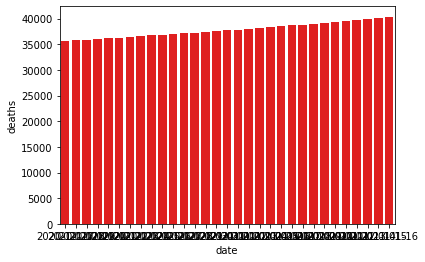

In [ ]:
sns.barplot(data = df_ny30 , x= "date", y = "deaths" , color="red")

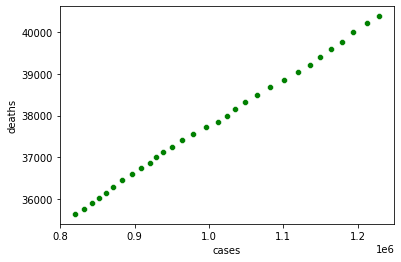

In [ ]:
sns.scatterplot(data=df_ny30 , x = "cases", y = 'deaths' , color = "green")

# Task5: Comparing Covid 19 data with different states

**Let's compare the Covid 19 cases after July for states: New York, California, Florida, Texas, Arizona**

In [ ]:
df.query("state== 'California' or state == 'New York' or state == 'Arizona' or state == 'Florida' or state == 'Texas'")
df2=df.query("state== 'California' or state == 'New York' or state == 'Arizona' or state == 'Florida' or state == 'Texas'")
df2=df2[(df2['date']>'2020-06-30')& (df2['date'] <'2021-01-01')]
drop_col = ['fips']
df2.drop(drop_col, inplace= True, axis=1)
df2
df2.head()


,date,state,cases,deaths
6616,2020-07-01,Arizona,84152,1726
6618,2020-07-01,California,239764,6168
6623,2020-07-01,Florida,158989,3549
6647,2020-07-01,New York,398770,31791
6660,2020-07-01,Texas,174826,2518


In [ ]:
def us_states(row):
    if row['state'] == 'New York':
        return 'NY'
    elif row['state'] == 'Florida':
        return 'FL'
    elif row['state'] == 'California':
        return 'CA'
    elif row['state'] == 'Texas':
        return 'TX'
    elif row['state'] == 'Arizona':
        return 'AZ'
    else:
        return 'N/A'
# apply to dataframe, use axis=1 to apply the function to every row
df2['us_states'] = df.apply(us_states, axis=1)
df2.head()

       

,date,state,cases,deaths,us_states
6616,2020-07-01,Arizona,84152,1726,AZ
6618,2020-07-01,California,239764,6168,CA
6623,2020-07-01,Florida,158989,3549,FL
6647,2020-07-01,New York,398770,31791,NY
6660,2020-07-01,Texas,174826,2518,TX


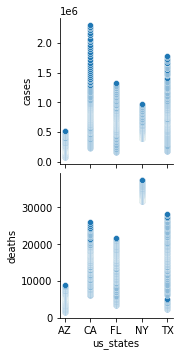

In [ ]:
sns.pairplot(x_vars=["us_states"], data=df2)


# Task6: Conclusion

Conclusion 1 : Task4: Understand NY covid 19 data in last 30 days

Over the last 30 days in New York City, we continue to see both deaths and cases are raising daily, at least over **8000+** new cases were reported. COVID -19 has been affecting us since early March but we are still seeing a positive relationship between deaths and cases over the last 30 days. As cases increase, deaths also increase. Lastly, as of 01-15-2021, there were a total of 1,213,179 cases, and 40,203 deaths. Compared to 30 days ago, 12-17-2020 ( **819,427** cases , **35,647** deaths), there were **4,556** more deaths, a **12.78%** increase and **393752** more cases, a **1104.59%** increase!!! 

Conclusion 2: Task 5:

It's clear from the comparison of New York, Florida, California, Texas, and Arizona that in the summer months the Covid-19 cases were very minimal. We can observe that as the fall and winter approached the cases began to rise to heights that reflected the original Covid-19 outbreak back in early 2020. Of course, as the cases began to rise, deaths also increased. When looking at the graph we can see that New York is far above the other four states in terms of deaths but that California had the most rapid increase of cases from July 1st 2020 to December 31st, 2020. It would be interesting to look into what caused this surge. Also, given that both California and NY are states with very large cities I think a comparison of government policies of both states could be very revealing.

